In [ ]:
"""
При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: 
strategy, popsize, mutation.

Постройте графики количества итераций (nit) 
оптимизации функции ackley от значения параметра.

Подробнее о результате выдачи тут
"""

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [ ]:
# частные производные
from sympy import *
x, y = symbols('x y')
df_dx = diff((-20 * exp(-0.2 * sqrt(0.5 * (x ** 2 + y ** 2))) - exp(0.5 *(cos(2 * pi * x) + cos(2 * pi * y))) + 20 + exp(1)),x)
df_dx

2.82842712474619*x*exp(-0.14142135623731*sqrt(x**2 + y**2))/sqrt(x**2 + y**2) + 1.0*pi*exp(0.5*cos(2*pi*x) + 0.5*cos(2*pi*y))*sin(2*pi*x)

In [ ]:
df_dy = diff((-20 * exp(-0.2 * sqrt(0.5 * (x ** 2 + y ** 2))) - exp(0.5 *(cos(2 * pi * x) + cos(2 * pi * y))) + 20 + exp(1)),y)
df_dy

2.82842712474619*y*exp(-0.14142135623731*sqrt(x**2 + y**2))/sqrt(x**2 + y**2) + 1.0*pi*exp(0.5*cos(2*pi*x) + 0.5*cos(2*pi*y))*sin(2*pi*y)

In [ ]:
# strategy, popsize, mutation


<BarContainer object of 5 artists>

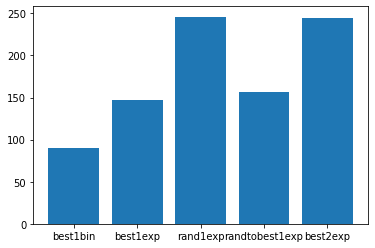

In [ ]:
# strategy

"""
The differential evolution strategy to use. Should be one of:
‘best1bin’
‘best1exp’
‘rand1exp’
‘randtobest1exp’
‘currenttobest1exp’
‘best2exp’
‘rand2exp’
‘randtobest1bin’
‘currenttobest1bin’
‘best2bin’
‘rand2bin’
‘rand1bin’
The default is ‘best1bin’.
"""

d_nit_strategy_1 = {}
d_nit_strategy_2 = {}
d_nit_strategy_3 = {}


strategy_1 = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', \
            'best2exp']
strategy_2 = ['rand2exp', 'randtobest1bin',\
            'best2bin', 'rand2bin', 'rand1bin']

strategy_3 = ['currenttobest1exp','currenttobest1bin']
for s in strategy_1:
  d_nit_strategy_1[s] = differential_evolution(ackley, bounds, seed=42, strategy=s).nit
# d_nit_strategy
plt.bar(d_nit_strategy_1.keys(), d_nit_strategy_1.values()) 


<BarContainer object of 5 artists>

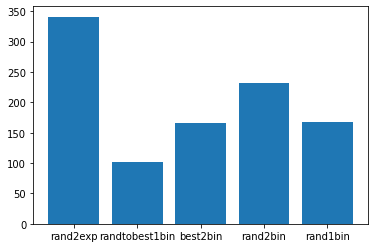

In [ ]:
for s in strategy_2:
  d_nit_strategy_2[s] = differential_evolution(ackley, bounds, seed=42, strategy=s).nit
plt.bar(d_nit_strategy_2.keys(), d_nit_strategy_2.values()) 

<BarContainer object of 2 artists>

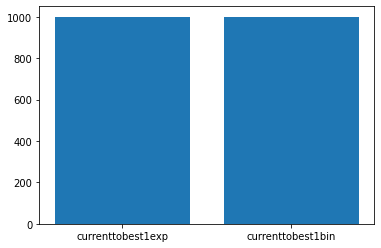

In [ ]:
for s in strategy_3:
  d_nit_strategy_3[s] = differential_evolution(ackley, bounds, seed=42, strategy=s).nit
plt.bar(d_nit_strategy_3.keys(), d_nit_strategy_3.values()) 

In [ ]:
d_nit_strategy

{'best1bin': 90,
 'best1exp': 147,
 'rand1exp': 246,
 'randtobest1exp': 156,
 'currenttobest1exp': 1000,
 'best2exp': 244,
 'rand2exp': 341,
 'randtobest1bin': 101,
 'currenttobest1bin': 1000,
 'best2bin': 166,
 'rand2bin': 232,
 'rand1bin': 168}

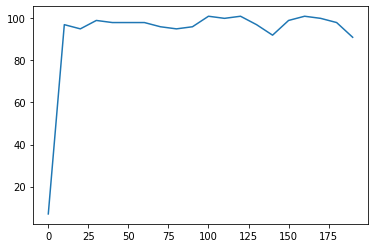

In [ ]:
# popsize
"""
A multiplier for setting the total population size. 
The population has popsize * N individuals. 
This keyword is overridden if an initial population 
is supplied via the init keyword. When using init='sobol' 
the population size is calculated as the next power of 2 after popsize * N.
"""
x = []
y =[]
for i in range(0,200,10):
  x.append(i)
  res = differential_evolution(ackley, bounds, seed=42, popsize=i)
  y.append(res.nit)
plt.plot(x,y)


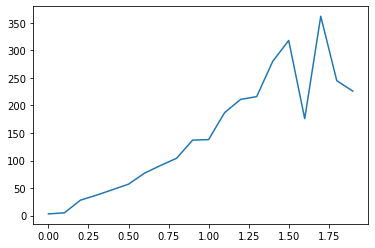

In [ ]:
`# mutation
"""
float or tuple(float, float), optional
The mutation constant. 
In the literature this is also known as differential weight, 
being denoted by F. 
If specified as a float it should be in the range [0, 2]. 
If specified as a tuple (min, max) dithering is employed. 
Dithering randomly changes the mutation constant on a generation by generation basis. The mutation constant for that generation is taken from U[min, max). Dithering can help speed convergence significantly. Increasing the mutation constant increases the search radius, but will slow down convergence.
"""

x = []
y =[]
for i in np.arange(0,2,0.1):
  x.append(i)
  res = differential_evolution(ackley, bounds, seed=42, mutation = i)
  y.append(res.nit)
plt.plot(x,y)

Поэкспериментируйте с параметрами и оптимизацией через minimize:

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

<BarContainer object of 8 artists>

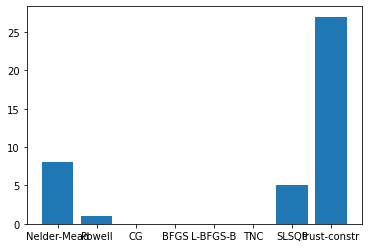

In [ ]:
method_1 = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'SLSQP', 'trust-constr']
method_jac = ['dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov', 'Newton-CG']
x0 = [0,0]

d_method_1 = {}
d_method_jac = {}

# , '','COBYLA' - AttributeError

for m in method_1:
  result_m = minimize(ackley, x0,  method=m)
  d_method_1[m] = result_m.nit
plt.bar(d_method_1.keys(), d_method_1.values()) 

In [ ]:
d_method_1

{'Nelder-Mead': 8,
 'Powell': 1,
 'CG': 0,
 'BFGS': 0,
 'L-BFGS-B': 0,
 'TNC': 0,
 'SLSQP': 5,
 'trust-constr': 27}

In [ ]:
minimize(ackley,  [0,0],  method='COBYLA')

     fun: 0.00028310899612238316
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 25
  status: 1
 success: True
       x: array([-8.76258342e-06,  9.96153459e-05])

In [ ]:
def fun_dif(x):
  dx = ((2.82842712474619*x[0]*np.exp(0.14142135623731*np.sqrt(x[0]**2 + x[1]**2)))/(x[0]**2 + x[1]**2)) + np.pi*np.exp(0.5*np.cos(2*np.pi*x[0]) + 0.5*np.cos(2*np.pi*x[1]))*np.sin(2*np.pi*x[0])
  dy = ((2.82842712474619*x[1]*np.exp(0.14142135623731*np.sqrt(x[0]**2 + x[1]**2)))/(x[0]**2 + x[1]**2)) + np.pi*np.exp(0.5*np.cos(2*np.pi*x[0]) + 0.5*np.cos(2*np.pi*x[1]))*np.sin(2*np.pi*x[1])
  return np.array([dx,dy])


In [ ]:
for m in method_jac:
  result_m = minimize(ackley, x0,  method=m, jac=fun_dif(x0))
  d_method_1[m] = result_m.nit
plt.bar(d_method_1.keys(), d_method_1.values()) 

<ipython-input-13-24ab3bac9e05>:2: RuntimeWarning: invalid value encountered in double_scalars
  dx = ((2.82842712474619*x[0]*np.exp(0.14142135623731*np.sqrt(x[0]**2 + x[1]**2)))/(x[0]**2 + x[1]**2)) + np.pi*np.exp(0.5*np.cos(2*np.pi*x[0]) + 0.5*np.cos(2*np.pi*x[1]))*np.sin(2*np.pi*x[0])
<ipython-input-13-24ab3bac9e05>:3: RuntimeWarning: invalid value encountered in double_scalars
  dy = ((2.82842712474619*x[1]*np.exp(0.14142135623731*np.sqrt(x[0]**2 + x[1]**2)))/(x[0]**2 + x[1]**2)) + np.pi*np.exp(0.5*np.cos(2*np.pi*x[0]) + 0.5*np.cos(2*np.pi*x[1]))*np.sin(2*np.pi*x[1])
/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:562: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif (jac in FD_METHODS and


ValueError: ignored

https://habr.com/ru/company/prequel/blog/568496/